# k-Nearest Neighbors (kNN)
About KNN: --> The k-nearest neighbors (KNN) algorithm is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. It is one of the popular and simplest classification and regression classifiers used in machine learning today. While the KNN algorithm can be used for either regression or classification problems, it is typically used as a classification algorithm, working off the assumption that similar points can be found near one another.

Dataset in use: --> make_classification from Scikit Learn

About dataset: --> This initially creates clusters of points normally distributed (std=1) about vertices of an n_informative-dimensional hypercube with sides of length 2*class_sep and assigns an equal number of clusters to each class. It introduces interdependence between these features and adds various types of further noise to the data. The algorithm is adapted from Guyon [1] and was designed to generate the “Madelon” dataset.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KDTree

## Synthetic dataset with 2 features
We'll create a simple binary classification dataset to visualize kNN.

In [2]:
# Create a synthetic dataset with 2 features
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

`KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')`

In [3]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn.predict(X_test)

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1])

In [4]:
y_test

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1])

In [5]:
accuracy = knn.score(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.80


In [6]:
accuracy = accuracy_score(y_test, knn.predict(X_test))
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.80


## Visualizing kNN for different k
Visualize how the KNN algorithm works for different values of k by plotting the decision boundaries for k = 1, 5, and 15.

In [7]:
# Function to plot decision boundaries
def plot_decision_boundary(X, y, clf, ax, title):
    # Create a mesh grid for plotting
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    
    # Predict classes for each point in the mesh grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary and data points
    ax.contourf(xx, yy, Z, alpha=0.4)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    ax.set_title(title)
    return scatter


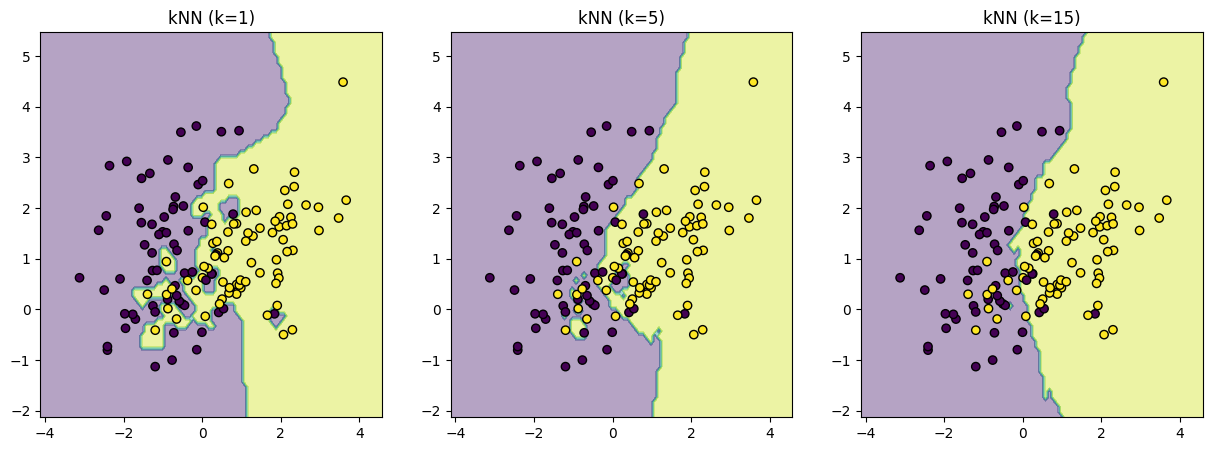

In [8]:
# Plot kNN for different k values
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
k_values = [1, 5, 15]

for k, ax in zip(k_values, axes):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    plot_decision_boundary(X_train, y_train, knn, ax, f'kNN (k={k})')

## Effect of data normalization
kNN is sensitive to the scale of the data. Let's see how normalization affects its performance.

In [9]:
# Normalize the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate KNN before and after normalization
knn_before = KNeighborsClassifier(n_neighbors=5)
knn_before.fit(X_train, y_train)
accuracy_before = accuracy_score(y_test, knn_before.predict(X_test))

knn_after = KNeighborsClassifier(n_neighbors=5)
knn_after.fit(X_train_scaled, y_train)
accuracy_after = accuracy_score(y_test, knn_after.predict(X_test_scaled))

print(f'Accuracy without normalization: {accuracy_before:.2f}')
print(f'Accuracy with normalization: {accuracy_after:.2f}')

Accuracy without normalization: 0.80
Accuracy with normalization: 0.87


## Using k-d Trees Outside of KNeighborsClassifier
k-d trees are used automatically by the KNeighborsClassifier. Normally, we do not want to use tham separately. However, we can if needed.

In [10]:
# Build a k-d tree for the training data
kd_tree = KDTree(X_train)

# Query the k-d tree for the nearest neighbor of a test point
test_point = X_test[0].reshape(1, -1)
dist, ind = kd_tree.query(test_point, k=5)

print('Query:', test_point)
print('Indices of 5 nearest neighbors:', ind)
print('Distances to 5 nearest neighbors:', dist)

Query: [[-0.62154585  2.99462288]]
Indices of 5 nearest neighbors: [[115 134  98   4  75]]
Distances to 5 nearest neighbors: [[0.25489825 0.32703898 0.50696969 0.74397365 0.7758282 ]]


## Synthetic dataset with 5 features
Let's create a dataset with more than 5 features. How to visualize kNN now?

In [11]:
# Create a synthetic dataset with 5 features
X, y = make_classification(n_samples=200, n_features=5, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn.predict(X_test)

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0])

In [13]:
y_test

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0])

In [14]:
accuracy = knn.score(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.85


## How to visualize? Apply PCA or tSNE!

PCA (Principal Component Analysis) and t-SNE (t-Distributed Stochastic Neighbor Embedding) both allow us to reduce the dimensionality of our dataset to 2 or 3 components for visualization purposes.

In [15]:
## Apply PCA for Visualization

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)


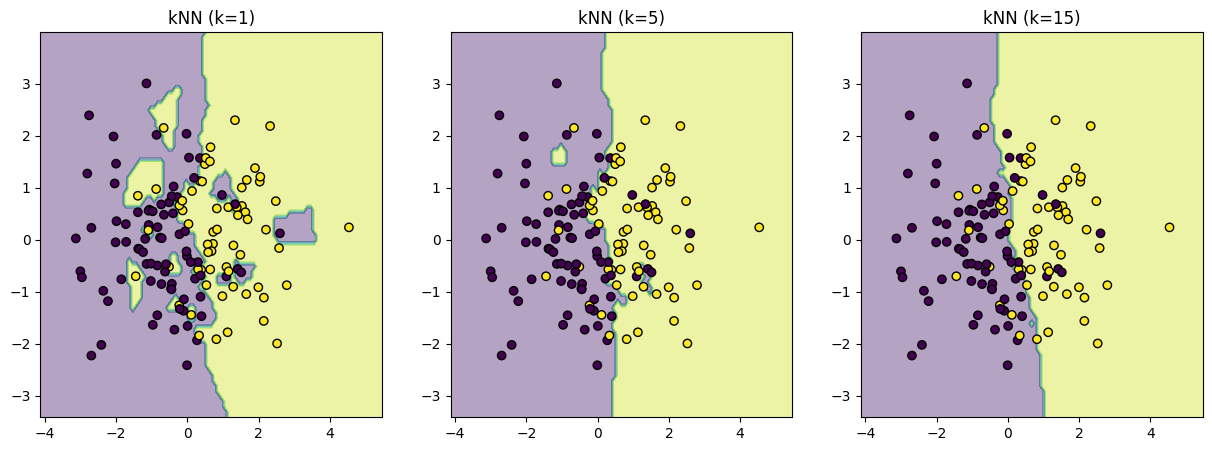

In [16]:
# Plot kNN for different k values
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
k_values = [1, 5, 15]

for k, ax in zip(k_values, axes):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_pca, y_train)
    plot_decision_boundary(X_pca, y_train, knn, ax, f'kNN (k={k})')

In [17]:
#  Apply t-SNE for Visualization

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train)

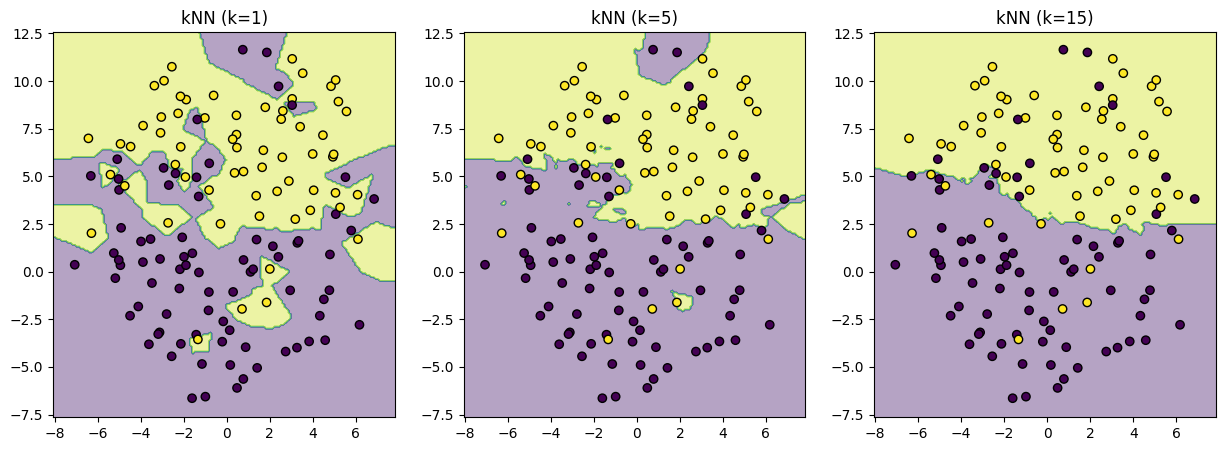

In [18]:
# Plot kNN for different k values
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
k_values = [1, 5, 15]

for k, ax in zip(k_values, axes):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_tsne, y_train)
    plot_decision_boundary(X_tsne, y_train, knn, ax, f'kNN (k={k})')